# Classification using Linear Discriminant Analysis

### Problem statement, Intutive understanding, Mathematical formulation and Solution using Python
Srabanti Ghosh

### Problem statement
The bank note authentication dataset is obtained from the UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/banknote+authentication)
The task is to classify a new note as REAL or FAKE using LDA.
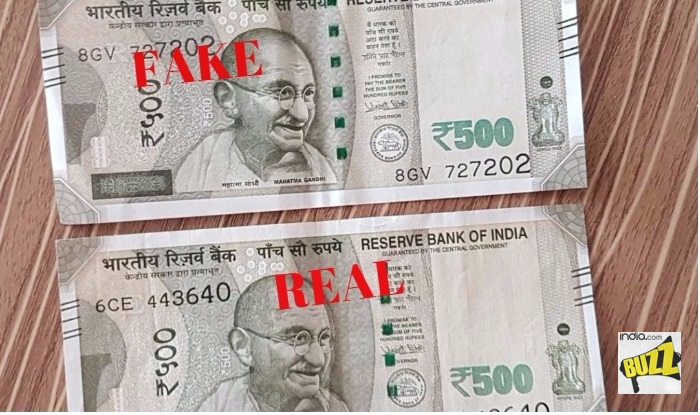


### Importing the modules:

In [156]:
import numpy as np  
import pandas as pd 
import os 
import glob
import gc 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import sklearn
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline


### Data fetching and pre-processing

In [157]:
#Fetching the root data:
Data_Root = 'D:\\real versus fake note python conversion'

Root_Data = pd.read_csv(os.path.join(Data_Root,'Book2.csv'), header=None)

In [158]:
#Checking the dimension of the Root_Data:
Root_Data.shape

(1372, 5)

In [159]:
#Changing feature names:
Root_Data.columns = ["variance","skewness","kurtosis","entrophy","class"]

In [160]:
#Checking the first 5 rows of the Root_Data:
Root_Data.head()

,variance,skewness,kurtosis,entrophy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [161]:
#Checking the descriptive statistics of the Root_Data:

Root_Data.info()

Root_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
kurtosis    1372 non-null float64
entrophy    1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


,variance,skewness,kurtosis,entrophy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [162]:
#Checking if there are any missing values in Root_Data:
Root_Data.isnull().sum()

variance    0
skewness    0
kurtosis    0
entrophy    0
class       0
dtype: int64

### Redefining the class labels

In [163]:
#Checking the unique leveks in column 'class':
set(Root_Data['class'])

{0, 1}

In [164]:
#Checking the distribution of the 'class' variable:
Root_Data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [165]:
#Redefining the class labels as 'FAKE' and 'REAL':
Root_Data.loc[:,'class'] = Root_Data.loc[:,'class'].apply(lambda x:"REAL" if x== 0 else "FAKE")

### Exploratory Data Analysis

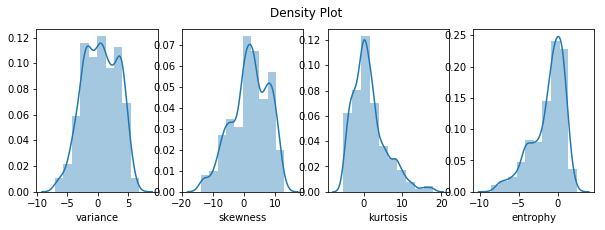

In [166]:
# checking the distribution of each of the variable in the entire dataset:

f, ax = plt.subplots(1, 4, figsize=(10,3))
vis1 = sns.distplot(Root_Data["variance"],bins=10, ax= ax[0])
vis2 = sns.distplot(Root_Data["skewness"],bins=10, ax=ax[1])
vis3 = sns.distplot(Root_Data["kurtosis"],bins=10, ax= ax[2])
vis4 = sns.distplot(Root_Data["entrophy"],bins=10, ax=ax[3])
plt.suptitle('Density Plot')
f.savefig('subplot.png')

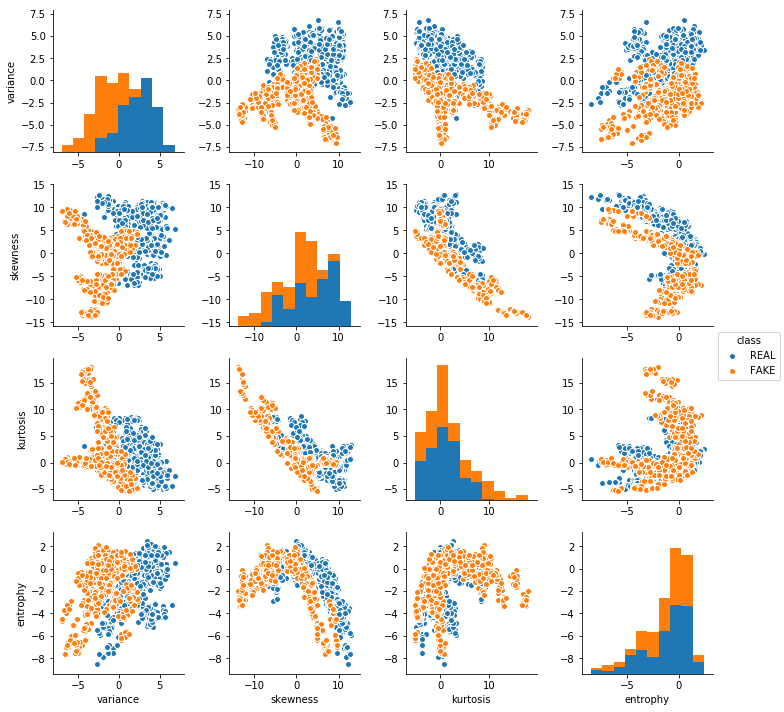

In [167]:
#Pair plot showing the relation between the dependent variable and all the other independent variables:
sns.pairplot(Root_Data, hue="class")

#### Representation of the correlation between he numerical variables using heat map:

Text(0.5,0.98,'Heat Map')

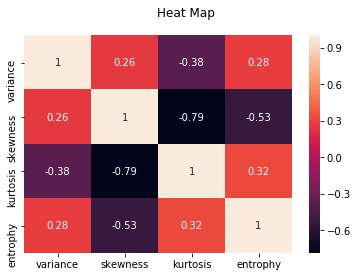

In [168]:
sns.heatmap(Root_Data.dropna().corr(), annot=True)
plt.suptitle('Heat Map')

### Splitting the Root_Data in 75:25 ratio

In [169]:
#splitting the data in 75:25 ratio
#selecting the independent variables:
x = Root_Data.drop('class', axis = 1)

#selecting the dependent variables:

y = Root_Data['class']

#splitting the data into Train and Test dataset:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 111)


### Model Building

In [170]:
# LDA applied to train data and is further used for prediction:
lda = LinearDiscriminantAnalysis()
lda.fit_transform(x_train,y_train)
predictions_lda = lda.predict(x_test)

In [171]:
# Print Accuracy Score for LDA
print("Accuracy Score is:")
print(accuracy_score(y_test, predictions_lda))
print()

Accuracy Score is:
0.99416909621



### Classification Report

In [172]:
print("Classification Report:")
print(classification_report(y_test, predictions_lda))

Classification Report:
             precision    recall  f1-score   support

       FAKE       0.99      1.00      0.99       170
       REAL       1.00      0.99      0.99       173

avg / total       0.99      0.99      0.99       343



In [173]:
#Kappa score showing how much we can be confident regarding the predicted accuracy:
print("kappa_score:")
print(cohen_kappa_score(y_test, predictions_lda))

kappa_score:
0.988338489783


In [174]:
# Confusion Matrix for predictions made
confusion_matrix = confusion_matrix(y_test,predictions_lda)
confusion_matrix

array([[170,   0],
       [  2, 171]], dtype=int64)

### Plotting the Confusion Matrix

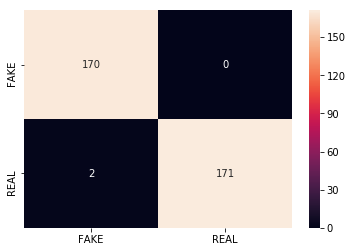

In [175]:
# Plot showing the confusion matrix:

label = ['FAKE', 'REAL']
sns.heatmap(confusion_matrix, fmt='.5g', annot=True, xticklabels=label, yticklabels=label)

### Perfoming Cross Validation due to the occurance of overfitting:
Results show that the accuracy is too good to be true, so in order to validate that our prediction is getting directed in the 
the correct way or not, in other words whether our model is overfitting or not we perform cross validation.
The goal of performing cross-validation is to test the model’s ability to predict new data that was not used in estimating it,
in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an 
independent dataset (i.e., an unknown dataset, for instance from a real problem).
However after performing Cross validation we could clearly see that our model is equally predicting well on the unseen data and the reults are given below.

In [176]:
accuracies=cross_val_score(estimator=lda,X=x_train,y=y_train,cv=7)
print(accuracies)
print(accuracies.mean())

[ 0.98648649  0.95918367  0.95918367  0.96598639  0.97278912  0.97278912
  0.97945205]
0.970838644867


### Performing the cross validation in the Test Data Set

In [177]:
accuracies=cross_val_score(estimator=lda,X=x_test,y=y_test,cv=7)
print(accuracies)
print(accuracies.mean())

[ 1.          1.          1.          0.95918367  0.97959184  0.97916667
  0.97916667]
0.985301263362


### Decision For New Input

In [178]:
#Fetching the new data:
Data_Root = 'D:\\real versus fake note python conversion'
New_Data = pd.read_csv(os.path.join(Data_Root,'new_data.csv'))

In [179]:
#checking the first 5 rows of the data:
New_Data.head()

,variance,skewness,kurtosis,entrophy
0,0.4305,1.975,1.3332,-1.2357
1,-7.0421,-13.498,-5.2613,-8.5482
2,6.8248,12.952,17.9274,2.4400


In [180]:
# LDA on the New_Data
predictions_lda = lda.predict(New_Data)

In [181]:
idx = 0 
new_col = [1,2,3]
New_Data.insert(loc=idx, column = "note.number", value =new_col)

In [182]:
New_Data.head()

,note.number,variance,skewness,kurtosis,entrophy
0,1,0.4305,1.975,1.3332,-1.2357
1,2,-7.0421,-13.498,-5.2613,-8.5482
2,3,6.8248,12.952,17.9274,2.4400


In [183]:
New_Data.insert(loc=idx, column = "predicted_class", value =predictions_lda)

In [184]:
# Visualizing the output:
New_Data.head()

,predicted_class,note.number,variance,skewness,kurtosis,entrophy
0,REAL,1,0.4305,1.975,1.3332,-1.2357
1,FAKE,2,-7.0421,-13.498,-5.2613,-8.5482
2,REAL,3,6.8248,12.952,17.9274,2.4400


### Reshuffling the column positions:

In [185]:
columnsTitles = ["note.number","variance","skewness","kurtosis","entrophy","predicted_class"]
New_Data.reindex(columns= columnsTitles)

,note.number,variance,skewness,kurtosis,entrophy,predicted_class
0,1,0.4305,1.975,1.3332,-1.2357,REAL
1,2,-7.0421,-13.498,-5.2613,-8.5482,FAKE
2,3,6.8248,12.952,17.9274,2.4400,REAL
